<a href="https://colab.research.google.com/github/Basytism/-PORTFOLIO-PROJECT-SET/blob/main/ecommerce_sales_dashboard_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()
np.random.seed(42)
Faker.seed(42)

categories = ['Electronics', 'Apparel', 'Home', 'Books', 'Beauty', 'Toys', 'Sports']
products = {
    'Electronics': ['Smartphone', 'Laptop', 'Headphones', 'Smartwatch', 'Wireless Mouse'],
    'Apparel': ['T-Shirt', 'Jeans', 'Jacket', 'Sneakers'],
    'Home': ['Blender', 'Vacuum Cleaner', 'Air Purifier', 'Lamp'],
    'Books': ['Fiction Novel', 'Data Science Book', 'Cookbook', 'Travel Guide'],
    'Beauty': ['Lipstick', 'Foundation', 'Perfume'],
    'Toys': ['Action Figure', 'Board Game', 'Puzzle'],
    'Sports': ['Football', 'Yoga Mat', 'Dumbbells']
}
regions = ['North', 'South', 'East', 'West', 'Central']

end_date = datetime.today()
start_date = end_date - timedelta(days=540)

data = []
for _ in range(5000):
    category = random.choice(categories)
    product = random.choice(products[category])
    region = random.choice(regions)
    order_date = fake.date_between(start_date=start_date, end_date=end_date)
    quantity = random.randint(1, 5)
    unit_price = round(random.uniform(10, 500), 2)
    total = round(quantity * unit_price, 2)
    delivery_days = random.randint(1, 10)

    data.append([
        fake.unique.random_int(min=1000, max=999999),
        product, category, region, order_date,
        quantity, unit_price, total, delivery_days
    ])

df = pd.DataFrame(data, columns=[
    "Order ID", "Product", "Category", "Region", "Order Date",
    "Quantity", "Unit Price", "Total", "Delivery Days"
])


In [7]:
df.to_csv("raw_sales_data.csv", index=False)
print("✅ Saved as raw_sales_data.csv")


✅ Saved as raw_sales_data.csv


In [8]:
from google.colab import files
files.download("raw_sales_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load CSV
df = pd.read_csv('raw_sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Ensure proper datetime format

df.head()


,Order ID,Product,Category,Region,Order Date,Quantity,Unit Price,Total,Delivery Days
0,27225,Action Figure,Toys,East,2024-12-26,3,337.06,1011.18,9
1,257787,Data Science Book,Books,East,2025-02-19,5,326.77,1633.85,1
2,773246,Foundation,Beauty,West,2024-05-15,4,97.71,390.84,5
3,777646,Smartphone,Electronics,South,2024-03-11,5,95.20,476.00,8
4,92161,Headphones,Electronics,North,2025-05-11,5,437.33,2186.65,9


In [12]:
# Shape and info
print("📦 Shape:", df.shape)
print("\n📋 Info:")
print(df.info())

# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())



📦 Shape: (5000, 9)

📋 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       5000 non-null   int64         
 1   Product        5000 non-null   object        
 2   Category       5000 non-null   object        
 3   Region         5000 non-null   object        
 4   Order Date     5000 non-null   datetime64[ns]
 5   Quantity       5000 non-null   int64         
 6   Unit Price     5000 non-null   float64       
 7   Total          5000 non-null   float64       
 8   Delivery Days  5000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 351.7+ KB
None

❓ Missing Values:
Order ID         0
Product          0
Category         0
Region           0
Order Date       0
Quantity         0
Unit Price       0
Total            0
Delivery Days    0
dtype: int64


In [13]:
total_revenue = df['Total'].sum()
avg_order_value = df['Total'].mean()
total_orders = df['Order ID'].nunique()
avg_delivery = df['Delivery Days'].mean()

print(f"💰 Total Revenue: Rs {total_revenue:,.0f}")
print(f"🧾 Avg Order Value: Rs {avg_order_value:,.0f}")
print(f"📦 Total Unique Orders: {total_orders}")
print(f"🚚 Avg Delivery Days: {avg_delivery:.2f}")


💰 Total Revenue: Rs 3,836,877
🧾 Avg Order Value: Rs 767
📦 Total Unique Orders: 5000
🚚 Avg Delivery Days: 5.50


In [14]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Total'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

fig = px.line(monthly_sales, x='Order Date', y='Total', title='📅 Monthly Revenue Trend')
fig.show()


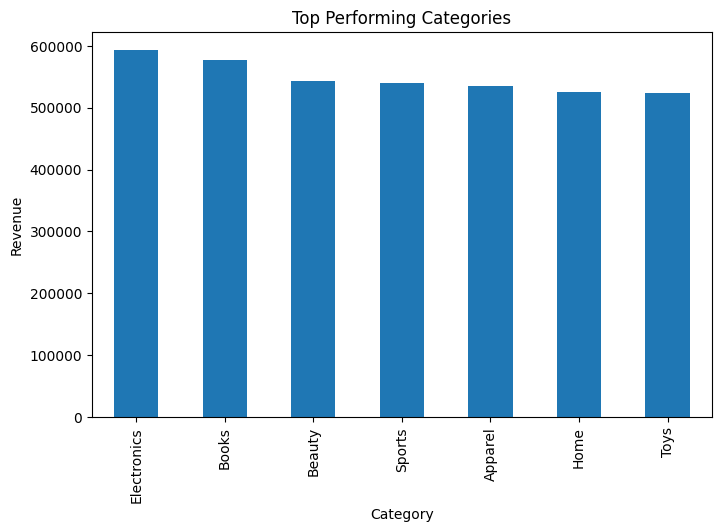

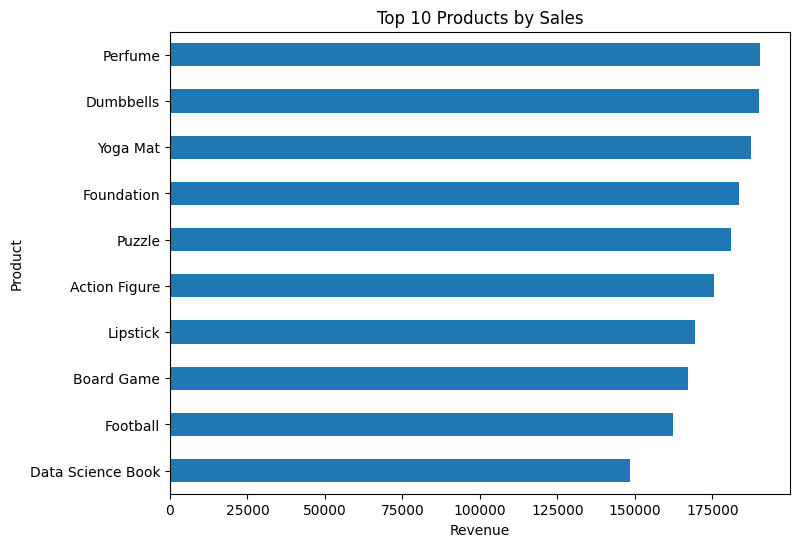

In [15]:
# Top Categories
top_cats = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
top_cats.plot(kind='bar', figsize=(8,5), title='Top Performing Categories')
plt.ylabel('Revenue')
plt.show()

# Top Products
top_products = df.groupby('Product')['Total'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,6), title='Top 10 Products by Sales')
plt.xlabel('Revenue')
plt.gca().invert_yaxis()
plt.show()


In [16]:
fig = px.pie(df, values='Total', names='Region', title='🌍 Sales Distribution by Region')
fig.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.



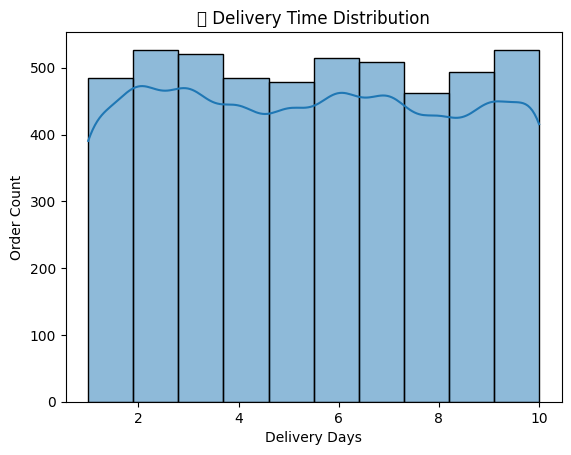

In [17]:
sns.histplot(df['Delivery Days'], bins=10, kde=True)
plt.title('📦 Delivery Time Distribution')
plt.xlabel('Delivery Days')
plt.ylabel('Order Count')
plt.show()


In [20]:
# Export processed monthly summary
monthly_sales.to_csv('monthly_sales_summary.csv', index=False)
files.download('monthly_sales_summary.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Made by Abdul Basit Noor | Powered by Synergy Speres 3.0**